In [18]:
df = [
    [30000, 27000, 20000, 25000, 29000, 35000, 38000, 40000, 45000, 28000, 30000, 55000, 65000, 25000],
    [11, 11, 12, 12, 13, 14, 14, 16, 16, 16, 18, 18, 22, 23],
    [10, 6, 10, 5, 5, 6, 5, 8, 7, 2, 6, 2, 5, 2]
]
n = len(df[0])

In [19]:
sum_y = sum(df[0])
mean_y = sum_y/n

sum_x1 = sum(df[1])
mean_x1 = sum_x1/n

sum_x2 = sum(df[2])
mean_x2 = sum_x2/n

print(sum_x1, sum_x2, sum_y, mean_y, mean_x1, mean_x2)

216 79 492000 35142.857142857145 15.428571428571429 5.642857142857143


In [20]:
x1_square = [i**2 for i in df[1]]
sum_x1_square = sum(x1_square)

x2_square = [i**2 for i in df[2]]
sum_x2_square = sum(x2_square)

y2 = [i**2 for i in df[0]]

x1y = [df[1][i]*df[0][i] for i in range(len(df[0]))]
sum_x1y = sum(x1y)

x2y = [df[2][i]*df[0][i] for i in range(len(df[0]))]
sum_x2y = sum(x2y)

x1x2 = [df[1][i]*df[2][i] for i in range(len(df[0]))]
sum_x1x2 = sum(x1x2)

In [21]:
sigmax1_square = sum_x1_square - sum_x1**2/n
sigmax2_square = sum_x2_square - sum_x2**2/n
sigma_x1y = sum_x1y - sum_x1*sum_y/n
sigma_x2y = sum_x2y - sum_x2*sum_y/n
sigma_x1x2 = sum_x1x2 - sum_x1*sum_x2/n

In [22]:
b1 = (sigmax2_square*sigma_x1y - sigma_x1x2*sigma_x2y)/(sigmax1_square*sigmax2_square - sigma_x1x2**2)
b2 = (sigmax1_square*sigma_x2y - sigma_x1x2*sigma_x1y) /(sigmax1_square*sigmax2_square - sigma_x1x2**2)
print(b1, b2)

1913.8552139088677 564.568669281183


In [23]:
b0 = mean_y - b1*mean_x1 - b2*mean_x2
b0

2429.024923033655

### Prediction

In [24]:
X1 = 60
X2 = 12
Y_pred = b0 + b1*X1 + b2*X2

In [25]:
Y_pred

124035.1617889399

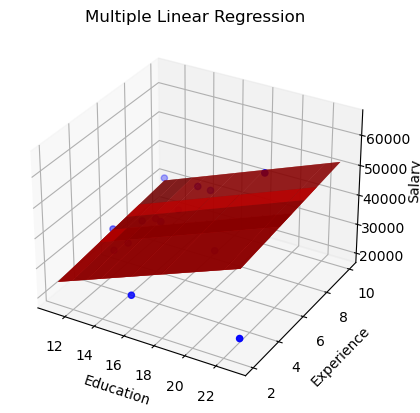

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

x1_grid, x2_grid = np.meshgrid(df[1], df[2])
y_grid = b0 + b1 * x1_grid + b2 * x2_grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for original data points
ax.scatter(df[1], df[2], df[0], color='blue', label='Data Points')

# Plotting the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5, label='Regression Plane')

# Labels and title
ax.set_xlabel('Education')
ax.set_ylabel('Experience')
ax.set_zlabel('Salary')
ax.set_title('Multiple Linear Regression')

plt.show()